# lesson 4

本节主要学习GIS中另一个最常用的功能：叠加分析。此外还有关于数据分类的内容。

## 学习目标

- 基于叠加分析创建新的geometries
- 聚合geometries
- 简化geometries
- 使用分类器，基于不同的标准，对数据进行分类

## 叠加分析

叠加分析首先就是分析geometries之间的相交。

直接上例子。

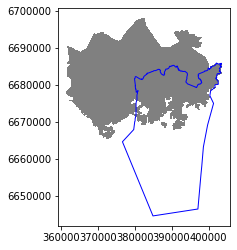

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups
%matplotlib inline

# File paths
border_fp = "L4_data/Helsinki_borders.shp"
grid_fp = "L4_data/TravelTimes_to_5975375_RailwayStation.shp"

# Read files
grid = gpd.read_file(grid_fp)
hel = gpd.read_file(border_fp)

# Plot the layers
ax = grid.plot(facecolor='gray')
hel.plot(ax=ax, facecolor='None', edgecolor='blue')

如图，目标是选择出相交部分。

首先最重要的是要检查CRS，确认是否是同一个crs。

In [4]:
# Ensure that the CRS matches, if not raise an AssertionError
assert hel.crs == grid.crs, "CRS differs between layers!"

执行叠加分析主要使用的是overlay()函数。该函数的输入有：

1. the GeoDataFrame where the selection is taken
2. the GeoDataFrame used for making the selection
3. parameter how that can be used to control how the overlay analysis is conducted (possible values are 'intersection', 'union', 'symmetric_difference', 'difference', and 'identity')

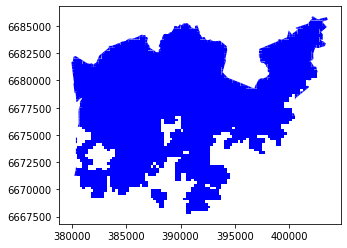

In [5]:
intersection = gpd.overlay(grid, hel, how='intersection')
intersection.plot(color="b")

首先，看看叠加后的数据都有哪些属性。

In [6]:
print(intersection.head())

   car_m_d  car_m_t  car_r_d  car_r_t  from_id  pt_m_d  pt_m_t  pt_m_tt  \
0    29476       41    29483       46  5876274   29990      76       95   
1    29456       41    29462       46  5876275   29866      74       95   
2    36772       50    36778       56  5876278   33541     116      137   
3    36898       49    36904       56  5876279   33720     119      141   
4    29411       40    29418       44  5878128   29944      75       95   

   pt_r_d  pt_r_t  pt_r_tt    to_id  walk_d  walk_t    GML_ID   NAMEFIN  \
0   24984      77       99  5975375   25532     365  27517366  Helsinki   
1   24860      75       93  5975375   25408     363  27517366  Helsinki   
2   44265     130      146  5975375   31110     444  27517366  Helsinki   
3   44444     132      155  5975375   31289     447  27517366  Helsinki   
4   24938      76       99  5975375   25486     364  27517366  Helsinki   

       NAMESWE NATCODE                                           geometry  
0  Helsingfors     091

从结果可以看到，包含了两个输入的所有属性。

接下来保存结果grid为geojson文件，一种常用来存储空间数据的格式。

In [7]:
# Output filepath
outfp = "L4_data/TravelTimes_to_5975375_RailwayStation_Helsinki.geojson"

# Use GeoJSON driver
intersection.to_file(outfp, driver="GeoJSON")

其他不同类型的叠加分析可以参考[Set-Operations with Overlay](http://geopandas.org/set_operations.html)文档。注意geopandas中polygon和point是不能叠加计算的。得用lesson 3中的内容处理。